## Simple Linear Regression

Stay with me now: 

model the relationship between one feature (x) and one response variable (y) using the following equation:
y=β0+β1x+ε

- y: the outcome we are trying to predict (e.g., fuel efficiency, test score)
- x: the feature used to make predictions (e.g., horsepower, hours studied)
- β0​: the intercept (value of y when x=0)
- β1​: the slope coefficient (change in y for each unit increase in x)
- ε: the error term (captures the variation not explained by the model)

TLDR:
- y = MPG (target)
- x = horsepower (feature)
- β0​ = intercept
- β1​ = slope coefficient
- ε = error term



The objective of linear regression is to find values for β0​ and β1​ that minimize the total squared differences between the predicted values  of y and the actual observed values of y.


**Linear regression** is not just a predictive tool—it's also interpretive. It helps us:

- Understand relationships between variables

- Identify causal patterns (in experimental settings)

- Provide baseline models in complex systems


Note: to use linear regression the data needs to be able to be linear and independent and the data needs to be loosely correlated.  


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="darkgrid")


158495.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Defaulting to user installation because normal site-packages is not writeable


In [147]:
X = df[["horsepower"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


Intercept: 40.61
Coefficient: -0.16


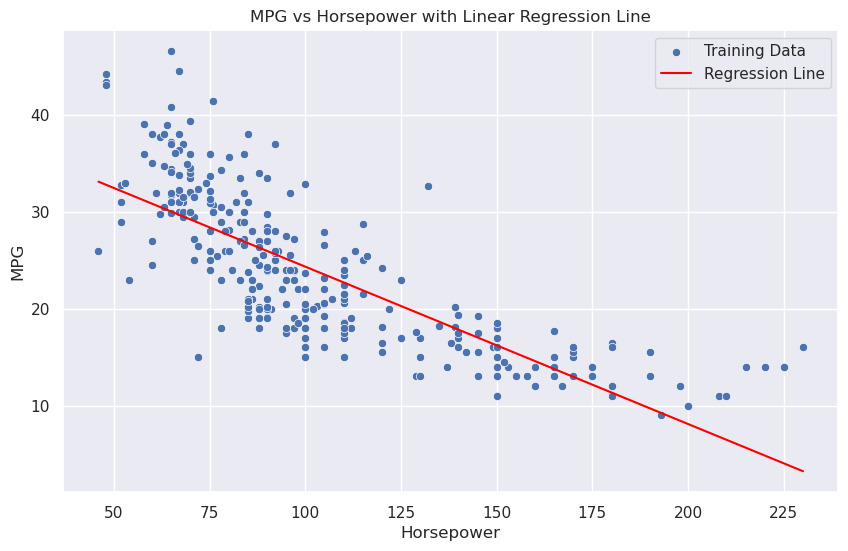

In [148]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train["horsepower"], y=y_train, label="Training Data")
sns.lineplot(x=X_train["horsepower"], y=model.predict(X_train), color="red", label="Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower with Linear Regression Line")
plt.legend()
plt.show()
